# Telecom Churn Dataset

## To Predict the behavior to retain Telecom customers. 

### Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Import the Data

In [3]:
df_train=pd.read_csv('churn-bigml-80.csv')

### Understanding the Data

In [4]:
df_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df_train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [7]:
df_train.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [8]:
df_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
df_train['Churn'].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

In [10]:
df_train['Churn']=df_train['Churn'].replace({True:1,False:0})

In [11]:
df_train['Churn'].value_counts()

0    2278
1     388
Name: Churn, dtype: int64

### Feature Engineering and Feature Selection

In [12]:
df_train['International plan']=df_train['International plan'].replace({'Yes':1,'No':0})
df_train['Voice mail plan']=df_train['Voice mail plan'].replace({'Yes':1,'No':0})

In [13]:
df_train.drop(['State'],axis=1,inplace=True)

In [14]:
df_train['Area code'].value_counts()

415    1318
510     679
408     669
Name: Area code, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df_train['Area code']=encoder.fit_transform(df_train['Area code'])

In [16]:
df_train['Area code'].value_counts()

1    1318
2     679
0     669
Name: Area code, dtype: int64

In [17]:
df_train.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [18]:
df_train.dtypes

Account length              int64
Area code                   int64
International plan          int64
Voice mail plan             int64
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                       int64
dtype: object

In [19]:
df_train.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


<AxesSubplot:>

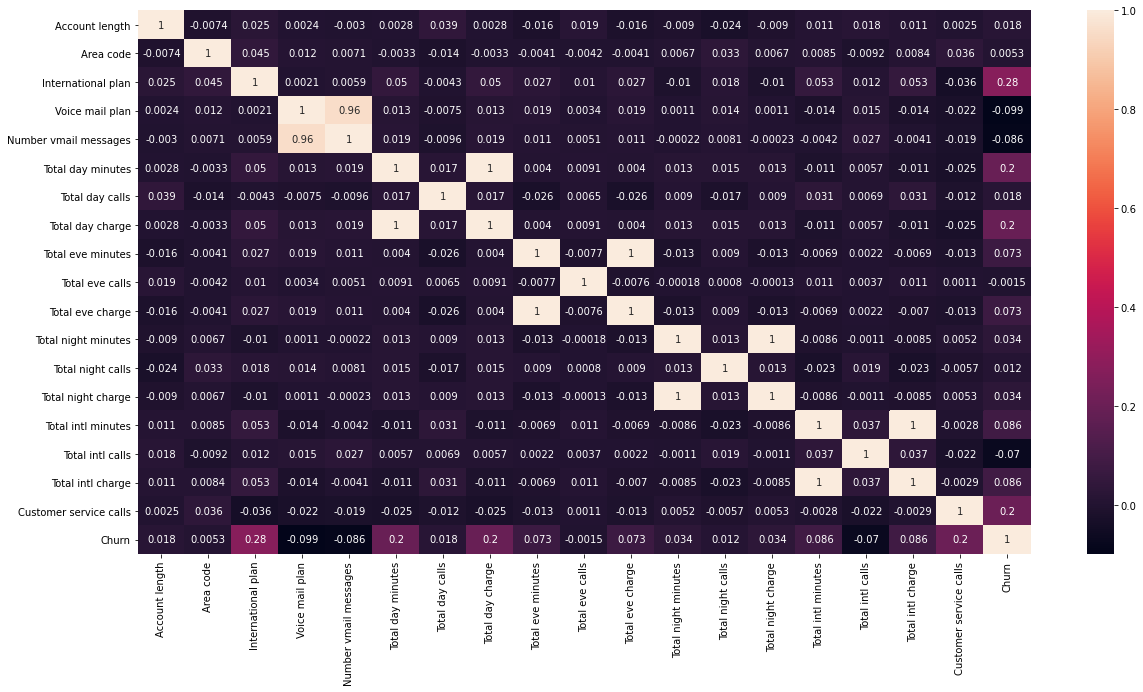

In [20]:
plt.figure(figsize=(20,10))
data_corr=df_train.corr()
sns.heatmap(data_corr,annot=True)

In [21]:
df_train.columns

Index(['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')

In [22]:
df_train.drop(['Voice mail plan','Total day charge','Total eve charge','Total night charge','Total intl charge'],inplace=True,axis=1)

<AxesSubplot:>

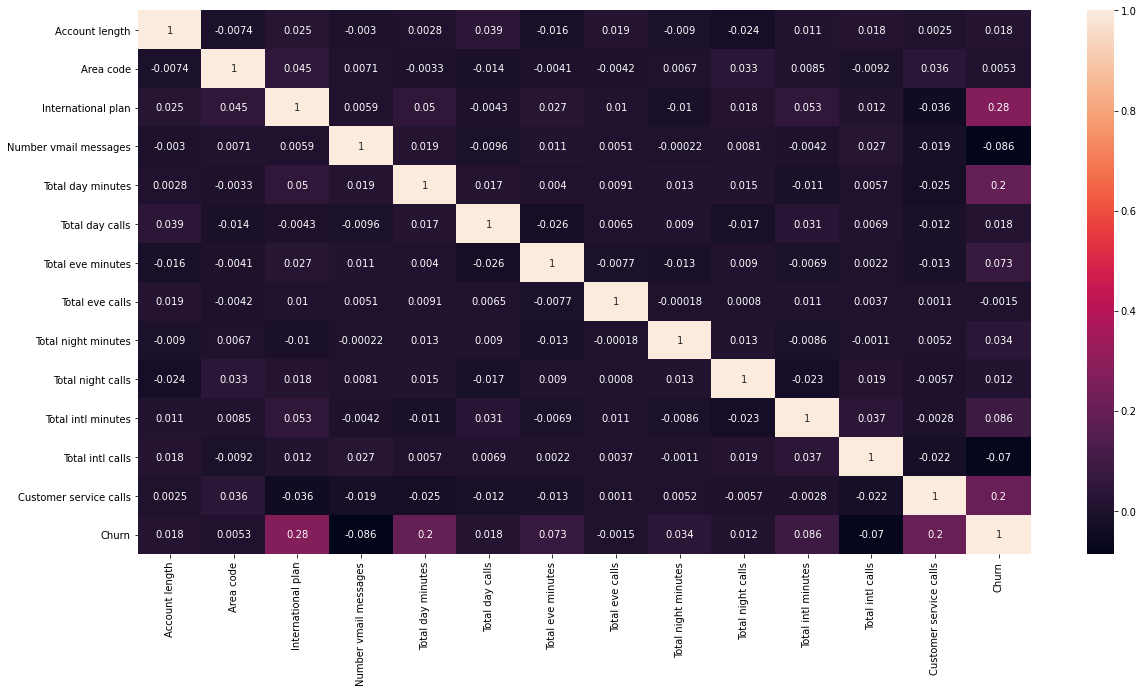

In [23]:
plt.figure(figsize=(20,10))
data_corr=df_train.corr()
sns.heatmap(data_corr,annot=True)

In [24]:
df_train.columns

Index(['Account length', 'Area code', 'International plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total eve minutes', 'Total eve calls', 'Total night minutes',
       'Total night calls', 'Total intl minutes', 'Total intl calls',
       'Customer service calls', 'Churn'],
      dtype='object')

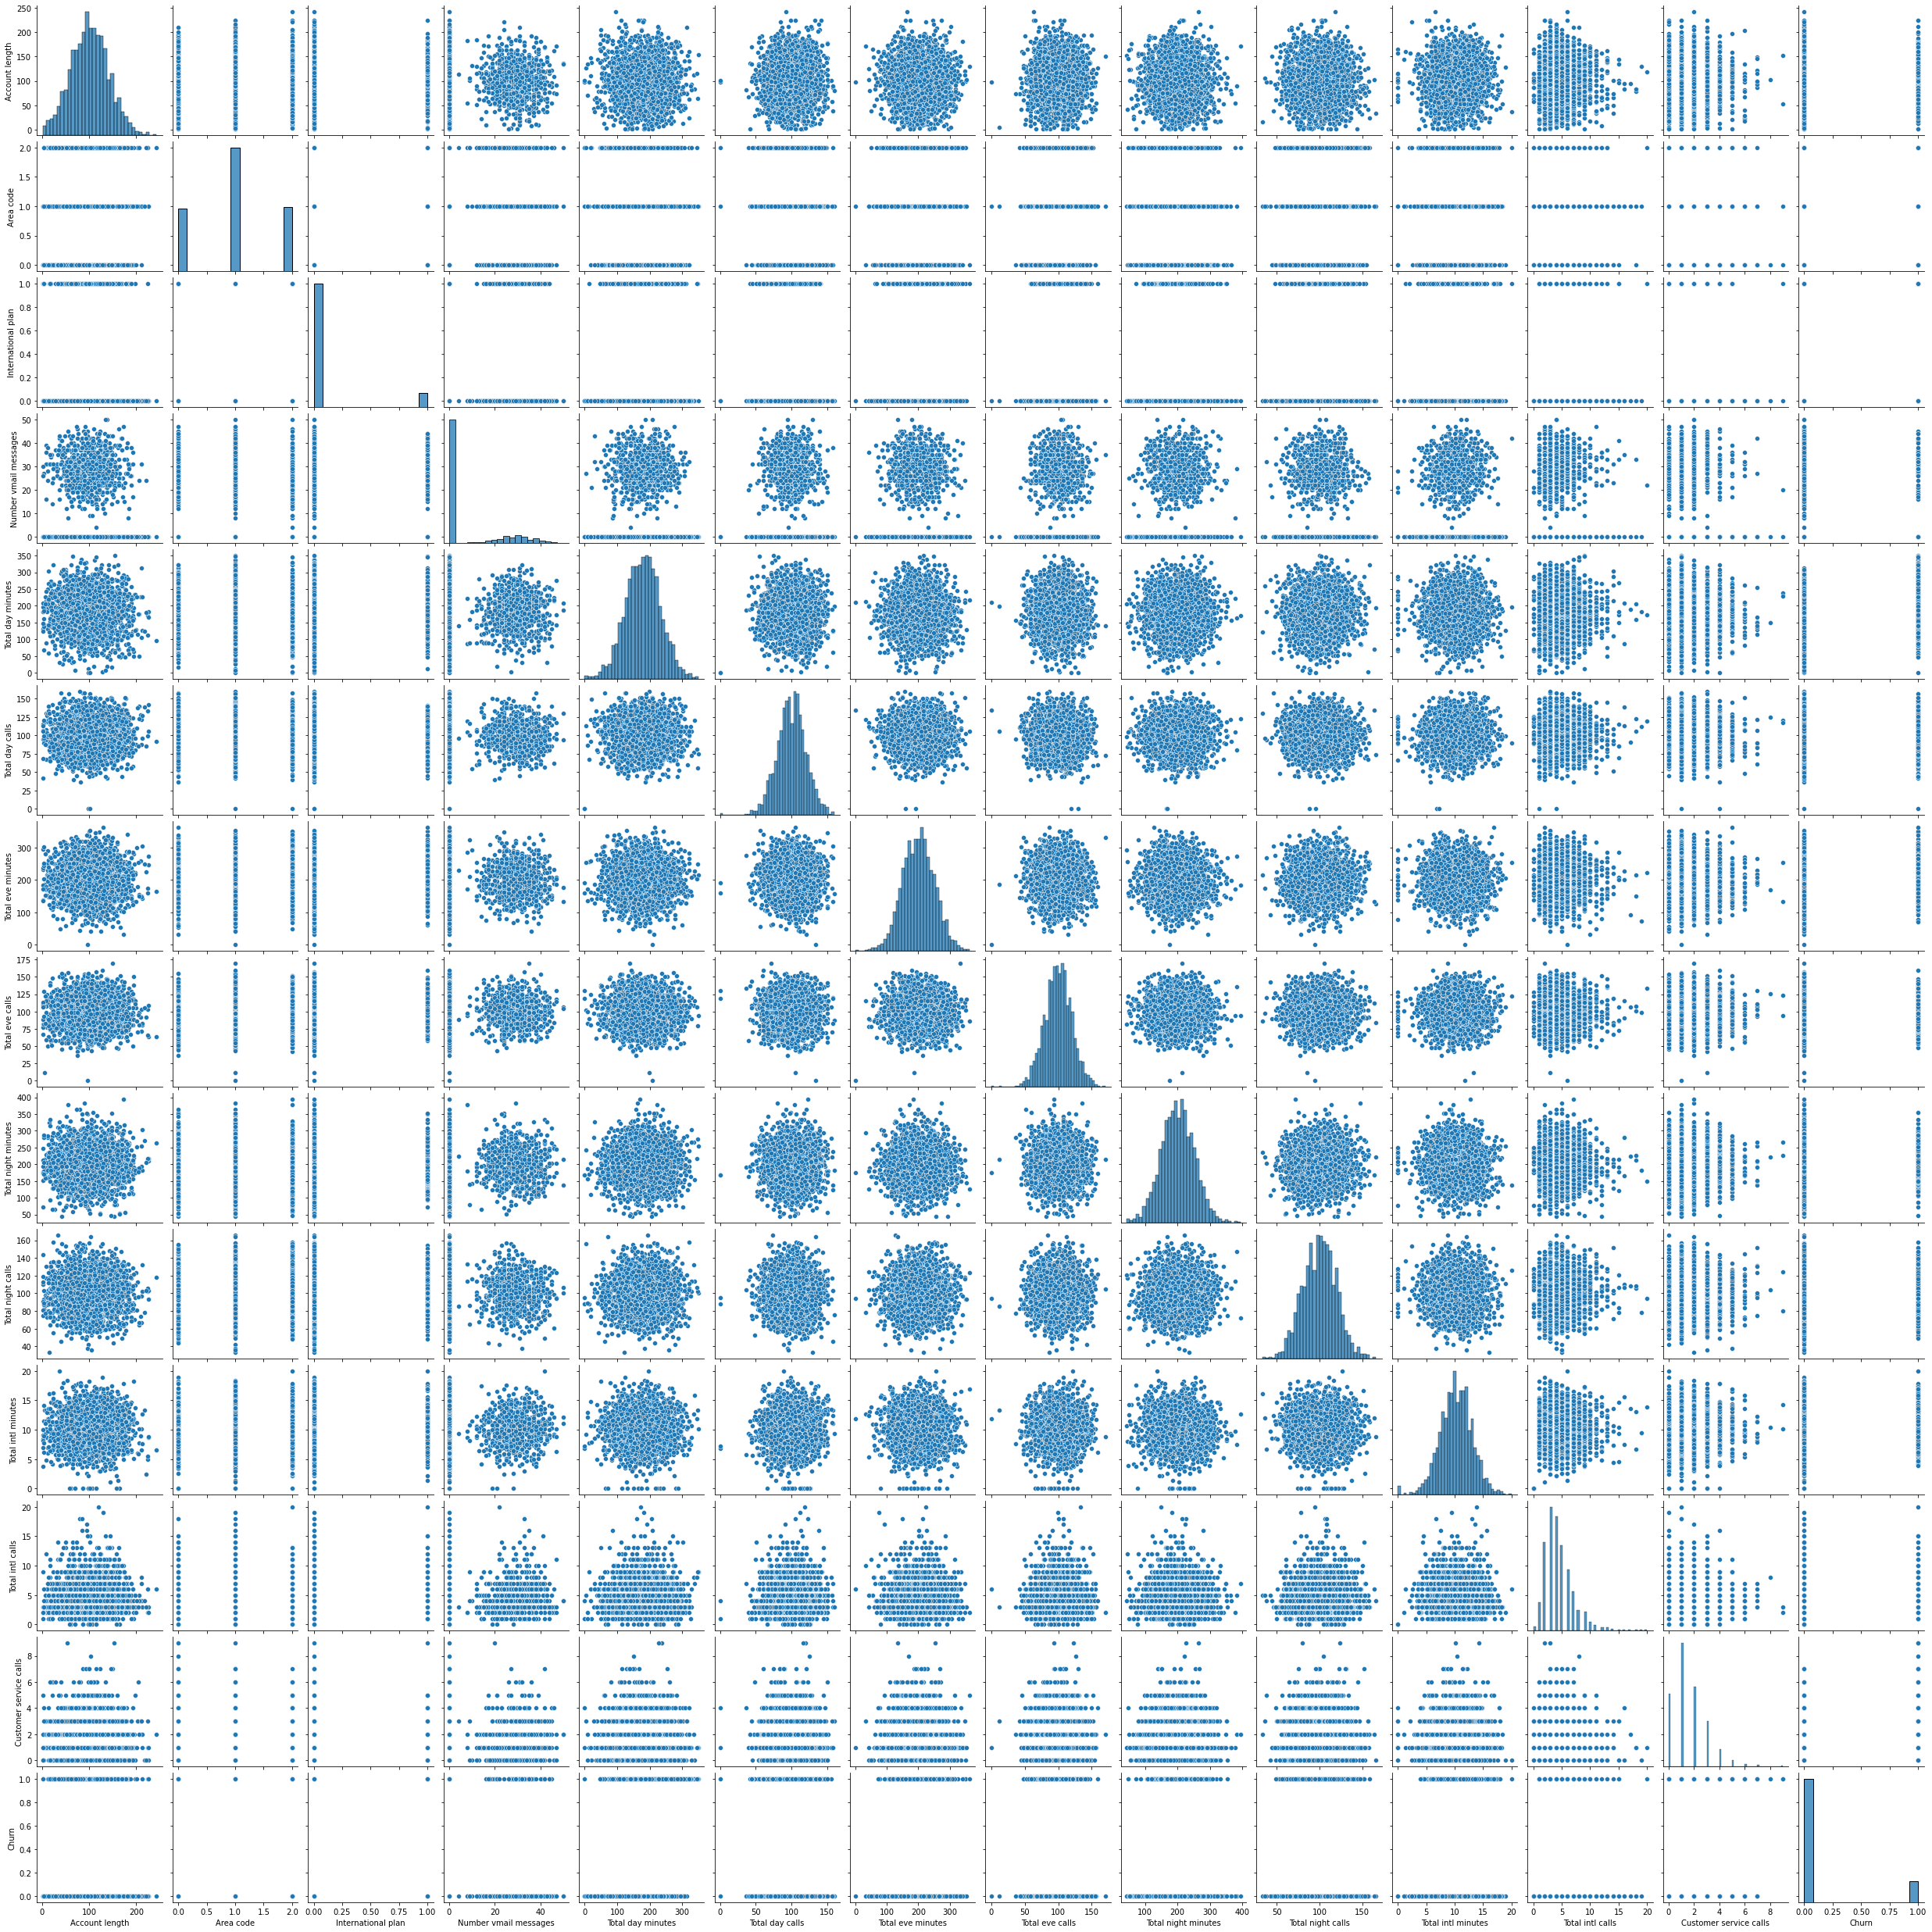

In [25]:
sns.pairplot(df_train)

### Splitting the Data

In [26]:
X=df_train.drop(columns=['Churn'])
y=df_train['Churn']

### Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr=LogisticRegression()

In [30]:
lr.fit(X_train,y_train)

LogisticRegression()

In [31]:
lr_pred=lr.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))
print(accuracy_score(y_test,lr_pred))

[[660   7]
 [131   2]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.91       667
           1       0.22      0.02      0.03       133

    accuracy                           0.83       800
   macro avg       0.53      0.50      0.47       800
weighted avg       0.73      0.83      0.76       800

0.8275


### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred=dtc.predict(X_test)

In [34]:
print(confusion_matrix(y_test,dtc_pred))
print(classification_report(y_test,dtc_pred))
print(accuracy_score(y_test,dtc_pred))

[[622  45]
 [ 33 100]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       667
           1       0.69      0.75      0.72       133

    accuracy                           0.90       800
   macro avg       0.82      0.84      0.83       800
weighted avg       0.91      0.90      0.90       800

0.9025


### Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred=rfc.predict(X_test)

In [36]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))
print(accuracy_score(y_test,rfc_pred))

[[663   4]
 [ 53  80]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       667
           1       0.95      0.60      0.74       133

    accuracy                           0.93       800
   macro avg       0.94      0.80      0.85       800
weighted avg       0.93      0.93      0.92       800

0.92875


In [37]:
#Randomized Search CV

from sklearn.model_selection import RandomizedSearchCV

n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
criterion=['gini','entropy']
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [38]:
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
             'criterion':criterion,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

In [39]:
rf=RandomForestClassifier()

rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,
                             scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,
                             random_state=0,n_jobs=1)

In [40]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, criterion=gini 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, criterion=gini, total=   3.3s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, criterion=gini 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, criterion=gini, total=   2.7s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, criterion=gini 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, criterion=gini, total=   2.8s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, criterion=gini 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, criterion=gini, total=   2.7s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, criterion=gini 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, criterion=gini, total=   3.0s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30, criterion=gini 
[CV]  n_estimators=400, min

[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=20, criterion=entropy, total=   1.7s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=20, criterion=entropy 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=20, criterion=entropy, total=   2.0s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=20, criterion=entropy 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=20, criterion=entropy, total=   2.1s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=20, criterion=entropy 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=20, criterion=entropy, total=   1.8s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=20, criterion=entro

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [41]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30,
 'criterion': 'gini'}

In [42]:
rf_random_pred=rf_random.predict(X_test)

In [43]:
print(confusion_matrix(y_test,rf_random_pred))
print(classification_report(y_test,rf_random_pred))
print(accuracy_score(y_test,rf_random_pred))

[[664   3]
 [ 53  80]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       667
           1       0.96      0.60      0.74       133

    accuracy                           0.93       800
   macro avg       0.94      0.80      0.85       800
weighted avg       0.93      0.93      0.92       800

0.93
